# 1. Importing the neccessary libraries

In [1]:
import nltk

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
from transformers import pipeline

In [17]:
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

# 2. Load the dataset


In [7]:
from google.colab import drive

# Mount the drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
from google.colab import files
uploaded = files.upload()


Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv


In [13]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Restaurant_Reviews.tsv']), sep='\t')

df.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [14]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


# 3. Preprocess the text:
- Converting to lowercase.
- Removing punctuation.
- Removing stopwords (common words like "and", "the").

In [18]:
#Functoin to clean the data
def preprocess_text(text):
  text = re.sub('[^a-zA-Z]', ' ',text).lower() ## Removes non-letter characters and convert to lowercase

  text = text.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  text = [ps.stem(word) for word in text if not word in set(all_stopwords)]
  text = ' '.join(text)
  return text



In [19]:

# Apply the function to the 'Review' column
df['cleaned_review'] = df['Review'].apply(preprocess_text)

# Display cleaned data
df[['Review', 'cleaned_review']].head()

,Review,cleaned_review
0,Wow... Loved this place.,wow love place
1,Crust is not good.,crust not good
2,Not tasty and the texture was just nasty.,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,select menu great price


# 4. Perform Sentiment Analysis:

In [20]:

sentiment_analyzer = pipeline("sentiment-analysis")

#Perform sentiment Analysis on Cleaned Reviews
df['sentiment'] = df['cleaned_review'].apply(lambda x: sentiment_analyzer(x)[0]['label'])

# Display the results
df[['Review', 'sentiment']].head()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


,Review,sentiment
0,Wow... Loved this place.,POSITIVE
1,Crust is not good.,NEGATIVE
2,Not tasty and the texture was just nasty.,NEGATIVE
3,Stopped by during the late May bank holiday of...,POSITIVE
4,The selection on the menu was great and so wer...,POSITIVE


In [21]:
df[['Review', 'cleaned_review', 'sentiment']].head()

,Review,cleaned_review,sentiment
0,Wow... Loved this place.,wow love place,POSITIVE
1,Crust is not good.,crust not good,NEGATIVE
2,Not tasty and the texture was just nasty.,not tasti textur nasti,NEGATIVE
3,Stopped by during the late May bank holiday of...,stop late may bank holiday rick steve recommen...,POSITIVE
4,The selection on the menu was great and so wer...,select menu great price,POSITIVE


# 5. Visualize Sentiment Distribution:

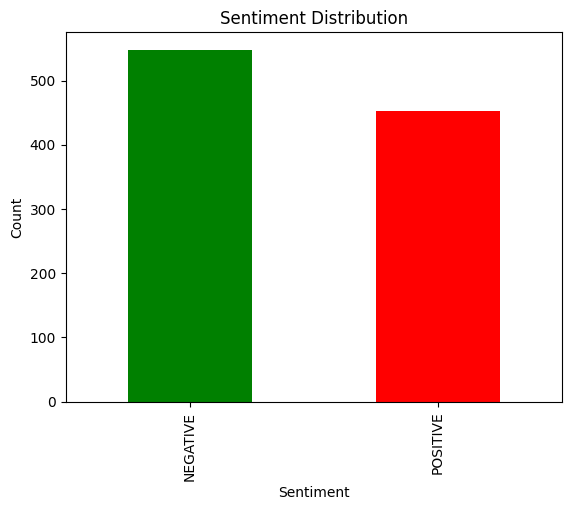

In [22]:
#Plot Sentiment Distribution
df['sentiment'].value_counts().plot(kind='bar',color=['green','red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# 6. Creating a bag of Words Model

In [23]:
cv = CountVectorizer(max_features = 1500)
x = cv.fit_transform(df['cleaned_review']).toarray()
y = df.iloc[:, -1].values

#7. Splitting the Data into Training and Test Set

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

# 8. Training the Naive Bayes model on the Train Set

In [26]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

# 9. Predicting the Test Set Results

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['POSITIVE' 'POSITIVE']
 ['NEGATIVE' 'NEGATIVE']
 ['POSITIVE' 'POSITIVE']
 ['NEGATIVE' 'NEGATIVE']
 ['NEGATIVE' 'NEGATIVE']
 ['POSITIVE' 'POSITIVE']
 ['NEGATIVE' 'NEGATIVE']
 ['NEGATIVE' 'NEGATIVE']
 ['POSITIVE' 'POSITIVE']
 ['POSITIVE' 'POSITIVE']
 ['NEGATIVE' 'POSITIVE']
 ['POSITIVE' 'NEGATIVE']
 ['POSITIVE' 'POSITIVE']
 ['POSITIVE' 'POSITIVE']
 ['POSITIVE' 'POSITIVE']
 ['POSITIVE' 'POSITIVE']
 ['POSITIVE' 'NEGATIVE']
 ['NEGATIVE' 'NEGATIVE']
 ['NEGATIVE' 'NEGATIVE']
 ['POSITIVE' 'POSITIVE']
 ['NEGATIVE' 'POSITIVE']
 ['NEGATIVE' 'POSITIVE']
 ['POSITIVE' 'POSITIVE']
 ['POSITIVE' 'POSITIVE']
 ['POSITIVE' 'POSITIVE']
 ['POSITIVE' 'POSITIVE']
 ['POSITIVE' 'POSITIVE']
 ['POSITIVE' 'POSITIVE']
 ['POSITIVE' 'POSITIVE']
 ['NEGATIVE' 'NEGATIVE']
 ['NEGATIVE' 'NEGATIVE']
 ['NEGATIVE' 'NEGATIVE']
 ['POSITIVE' 'POSITIVE']
 ['POSITIVE' 'NEGATIVE']
 ['POSITIVE' 'POSITIVE']
 ['NEGATIVE' 'NEGATIVE']
 ['POSITIVE' 'NEGATIVE']
 ['NEGATIVE' 'NEGATIVE']
 ['POSITIVE' 'POSITIVE']
 ['POSITIVE' 'NEGATIVE']


# 10. Making the Confusion matrix

In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[57 48]
 [18 77]]


0.67